In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2023-01-01'
end = '2024-12-21'
stock = 'AAPL'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2023-01-03,123.470612,129.226052,122.582119,128.613985,112117500
1,2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2,2023-01-05,123.421249,126.136083,123.164580,125.504267,80962700
3,2023-01-06,127.962410,128.623840,123.292902,124.398582,87754700
4,2023-01-09,128.485611,131.703931,128.228941,128.801526,70790800
...,...,...,...,...,...,...
491,2024-12-16,250.435867,250.775061,247.054026,247.393219,51694800
492,2024-12-17,252.869995,253.219159,249.178902,249.478183,51356400
493,2024-12-18,247.453079,253.668083,247.143828,251.553189,56774100


In [7]:
ma_100_days = data.Close.rolling(100).mean()

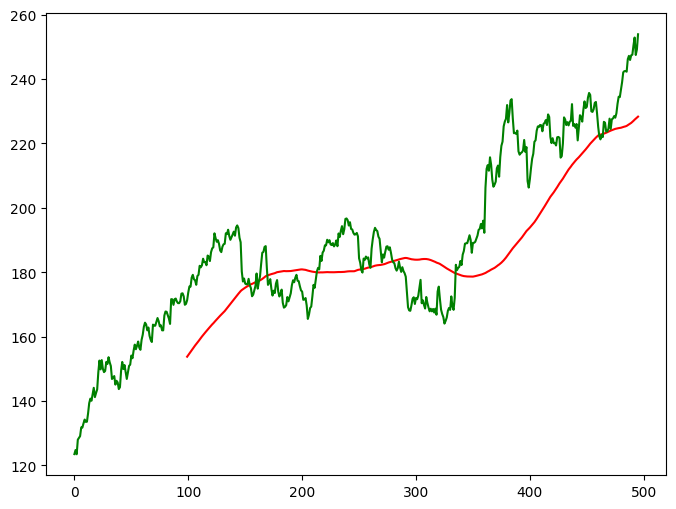

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

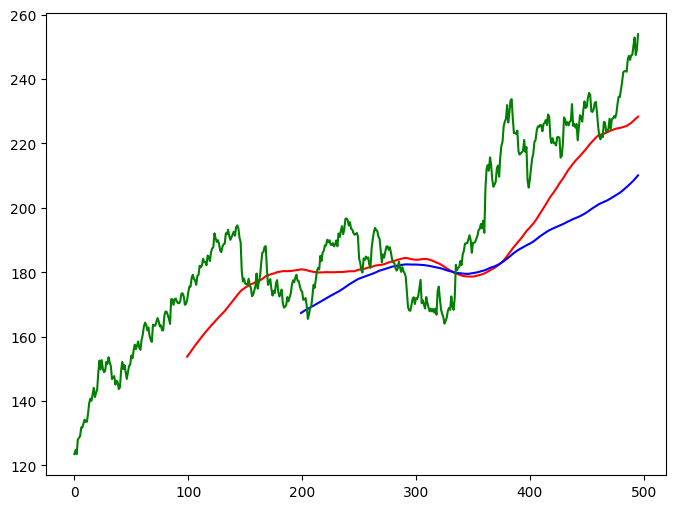

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [37]:
data.dropna(inplace=True)

In [38]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2023-01-03,123.470612,129.226052,122.582119,128.613985,112117500
1,2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2,2023-01-05,123.421249,126.136083,123.164580,125.504267,80962700
3,2023-01-06,127.962410,128.623840,123.292902,124.398582,87754700
4,2023-01-09,128.485611,131.703931,128.228941,128.801526,70790800
...,...,...,...,...,...,...
491,2024-12-16,250.435867,250.775061,247.054026,247.393219,51694800
492,2024-12-17,252.869995,253.219159,249.178902,249.478183,51356400
493,2024-12-18,247.453079,253.668083,247.143828,251.553189,56774100


In [39]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])


In [13]:
data_train.shape[0]

396

In [14]:
data_test.shape[0]

100

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [40]:
print("data_train type:", type(data_train))
print("data_train shape:", data_train.shape if hasattr(data_train, 'shape') else 'No shape attribute')
print(data_train.head() if hasattr(data_train, 'head') else data_train[:5])


data_train type: <class 'pandas.core.frame.DataFrame'>
data_train shape: (396, 1)
Ticker        AAPL
0       123.470612
1       124.744118
2       123.421249
3       127.962410
4       128.485611


In [41]:
data_train_scale = scaler.fit_transform(data_train)

In [42]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [43]:
x, y = np.array(x), np.array(y)

In [44]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [45]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [47]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.2467
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0322
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0228
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0197
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0252
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0172
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0189
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0174
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0172
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0179
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 0.0164
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 0.0135
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 0.0130
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 0.0184
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - loss: 0.0164

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [50]:
pas_100_days = data_train.tail(100)

In [51]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [52]:
data_test_scale  =  scaler.fit_transform(data_test)

In [53]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [54]:
y_predict = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


In [55]:
scale =1/scaler.scale_

In [56]:
y_predict = y_predict*scale

In [33]:
y = y*scale

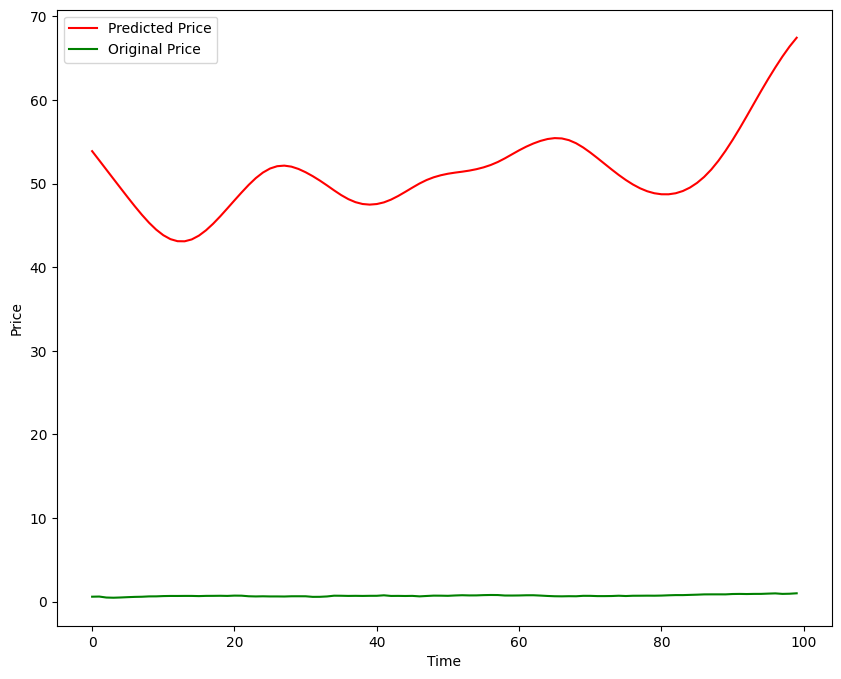

In [57]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
model.save('Stock Predictions Model.keras')